# Master Equation Solver: Single-Qubit Dynamics

Authors: J.R. Johansson and P.D. Nation

Modified by: C. Staufebiel (2022)

### Introduction
In this notebook we will explore the dynamics of a single-qubit interacting with an environment. The evolution of the qubit state is governed by the Master equation. We will make use of the master equation solver `qutip.mesolve` implemented in qutip, to obtain the time-evolution of the qubit for different settings.

You can read more about the master equation solver (and the theory behind it) in the [QuTiP docs](https://qutip.readthedocs.io/en/latest/apidoc/functions.html?highlight=sesolve#module-qutip.sesolve).

### Import
Here we import the required modules for this example.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from qutip import Bloch, about, basis, mesolve, sigmam, sigmax, sigmay, sigmaz

%matplotlib inline

### System setup
We will start with a basic Hamiltonian for the qubit, which flips the state of the qubit represented by the Pauli Matrix $\sigma_x$.

$H = \frac{\Delta}{2} \sigma_x$

Additionally, we add a collapse operator that describes the dissipation of energy from the qubit to an external environment. The collapse operator is defined by

$C = \sqrt{g} \sigma_z$

where $g$ is the dissipation coefficient.
We define the qubit to be in the ground state at $t=0$.

In [2]:
# coefficients
delta = 2 * np.pi
g = 0.25

# hamiltonian
H = delta / 2.0 * sigmax()

# list of collapse operators
c_ops = [np.sqrt(g) * sigmaz()]

# initial state
psi0 = basis(2, 0)

# times
tlist = np.linspace(0, 5, 100)

### Time-evolution
We pass these definition to the `qutip.mesolve` function. The collapse operators need to be passed in a list (even if there is only one collapse operator). As the fifth argument we pass a list of operators, for which the solver will return the expectation value at the given times in `tlist`. In this example we want to obtain the expectation value for $\sigma_z$.

In [3]:
res = mesolve(H, psi0, tlist, c_ops, [sigmaz()])

For this particular Hamiltonian and dissipation process we can derive the analytical solution for the expectation value of $\sigma_z$.

In [4]:
sz_analytic = np.cos(2 * np.pi * tlist) * np.exp(-tlist * g)

### Comparison to Analytical Solution
By plotting the expectation value from `mesolve` and the analytical result we can verify the correctness of the result. We can access the expectation value generated by `mesolve` by accessing `result.expect[0]`.

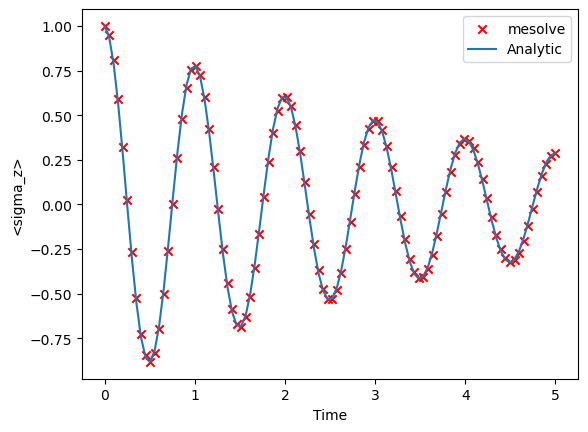

In [5]:
plt.scatter(tlist, res.expect[0], c="r", marker="x", label="mesolve")
plt.plot(tlist, sz_analytic, label="Analytic")
plt.xlabel("Time"), plt.ylabel("<sigma_z>")
plt.legend();

## Qubit Dynamics on the Bloch Sphere

We can also visualise the dynamics of the qubit state on the Bloch sphere. To generate more interesting plots, we consider slightly more complex dynamics of the qubit state.

### Rotating State

Consider the following Hamiltonian: 

$H = \Delta ( \, cos(\theta) \, \sigma_z + sin(\theta) \, \sigma_x  \, )$.

$\theta$ defines the angle of the qubit state between the $z$-axis toward the $x$-axis. We can again use `mesolve` to obtain the dynamics of the system. Here, we pass an empty list of collapse operators.

In [6]:
# Angle
theta = 0.2 * np.pi

# Hamiltonian
H = delta * (np.cos(theta) * sigmaz() + np.sin(theta) * sigmax())

# Obtain Time Evolution
tlist = np.linspace(0, 5, 1000)
result = mesolve(H, psi0, tlist, [], [sigmax(), sigmay(), sigmaz()])

We can visualise the state on the Bloch sphere by using the `qutip.Bloch` class. We can add points to the Bloch sphere and also vectors representing states.

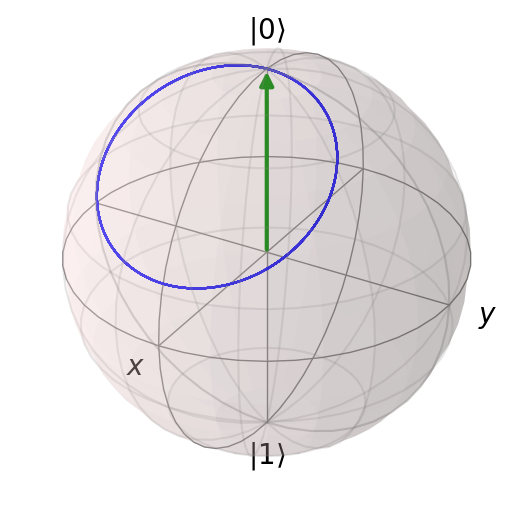

In [7]:
# Extract expectation values for pauli matrices
exp_sx_circ, exp_sy_circ, exp_sz_circ = result.expect
exp_sx_circ, exp_sy_circ, exp_sz_circ = (
    np.array(exp_sx_circ),
    np.array(exp_sy_circ),
    np.array(exp_sz_circ),
)

# Create Bloch sphere plot
sphere = Bloch()
sphere.add_points([exp_sx_circ, exp_sy_circ, exp_sz_circ], meth="l")
sphere.add_states(psi0)
sphere.show()

From the plot we can see the time-evolution of the initial state, which is a circular movement on the sphere's surface. As before, we add some collapse operators to the system, which alter the dynamics of the system. 

### Qubit dephasing

To change the phase of the qubit we introduce the following collapse operator:

$C = \sqrt{\gamma_p} \; \sigma_z$

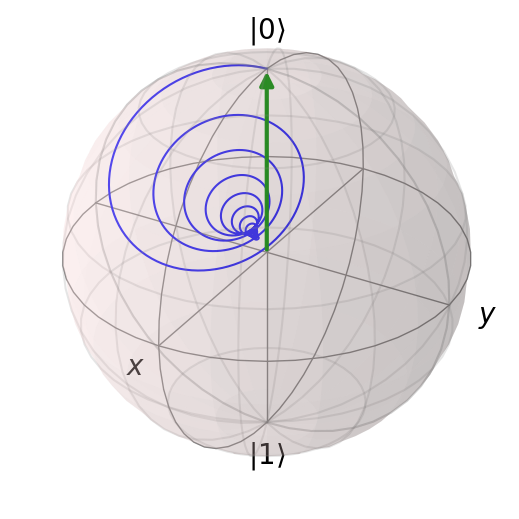

In [8]:
gamma_phase = 0.5
c_ops = [np.sqrt(gamma_phase) * sigmaz()]

# solve dynamics
result = mesolve(H, psi0, tlist, c_ops, [sigmax(), sigmay(), sigmaz()])
exp_sx_dephase, exp_sy_dephase, exp_sz_dephase = result.expect
exp_sx_dephase, exp_sy_dephase, exp_sz_dephase = (
    np.array(exp_sx_dephase),
    np.array(exp_sy_dephase),
    np.array(exp_sz_dephase),
)

# Create Bloch sphere plot
sphere = Bloch()
sphere.add_points([exp_sx_dephase, exp_sy_dephase, exp_sz_dephase], meth="l")
sphere.add_states(psi0)
sphere.show()

We can observe the dephasing of the qubit by the decreasing radius of the qubit state movement.

### Qubit relaxation

Another type of dissipation we can explore is the relaxation of the qubit originating from the collapse operator

$C = \sqrt{\gamma_r} \sigma_-$

This induces spontaneous flips of the qubit from the excited state to the ground state with a rate $\gamma_r$. Again we can observe the qubit dynamics on the Bloch sphere.

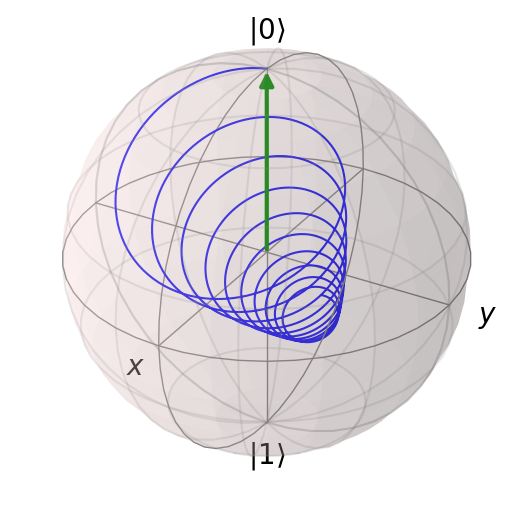

In [9]:
gamma_relax = 0.5
c_ops = [np.sqrt(gamma_relax) * sigmam()]

# solve dynamics
result = mesolve(H, psi0, tlist, c_ops, [sigmax(), sigmay(), sigmaz()])
exp_sx_relax, exp_sy_relax, exp_sz_relax = result.expect

# Create Bloch sphere plot
sphere = Bloch()
sphere.add_points([exp_sx_relax, exp_sy_relax, exp_sz_relax], meth="l")
sphere.add_states(psi0)
sphere.show()

We can see how the circular trajectory shifts more to the ground state of the qubit. 

### Conclusion
Using the methods above, you can simulate any dissipative quantum system, whose dynamics are described by the master equation. Additionally you can make use of the methods to visualise the dynamics of a qubit state on the Bloch sphere.

## About

In [10]:
about()


QuTiP: Quantum Toolbox in Python
Copyright (c) QuTiP team 2011 and later.
Current admin team: Alexander Pitchford, Nathan Shammah, Shahnawaz Ahmed, Neill Lambert, Eric Giguère, Boxi Li, Jake Lishman, Simon Cross, Asier Galicia, Paul Menczel, and Patrick Hopf.
Board members: Daniel Burgarth, Robert Johansson, Anton F. Kockum, Franco Nori and Will Zeng.
Original developers: R. J. Johansson & P. D. Nation.
Previous lead developers: Chris Granade & A. Grimsmo.
Currently developed through wide collaboration. See https://github.com/qutip for details.

QuTiP Version:      5.1.0.dev0+c874c4a
Numpy Version:      1.22.4
Scipy Version:      1.13.1
Cython Version:     3.0.10
Matplotlib Version: 3.5.2
Python Version:     3.10.4
Number of CPUs:     4
BLAS Info:          Generic
INTEL MKL Ext:      False
Platform Info:      Linux (x86_64)
Installation path:  /usr/share/miniconda3/envs/test-environment/lib/python3.10/site-packages/qutip
Please cite QuTiP in your publication.
For your convenience a bi

### Testing

In [11]:
assert np.allclose(res.expect[0], sz_analytic, atol=0.05)
assert np.allclose(exp_sz_circ**2 + exp_sy_circ**2 + exp_sx_circ**2, 1.0)
assert np.all(
    np.diff(exp_sx_dephase**2 + exp_sy_dephase**2 + exp_sz_dephase**2) <= 0
)